## Estadística Aplicada

Segundo examen parcial

Karla Mariana Ley Acero 2076201

Grupo 42

In [98]:
#Librerías básicas

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [99]:
prestamos_creditos = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/credit_risk.csv')

In [100]:
prestamos_creditos.head()

,saldo_cuenta,meses,historia_crediticia,uso,cantidad,saldo_cuenta_ahorro,años_trabajando,tasa_de_interes,genero_estado_civil,aval,...,activos,edad,planes_de_pago,casa,numero_creditos,situacion_laboral,dependientes_economicos,telefono,extranjero,credito_pagado
0,menor_a_cero,6,no_ha_pagado,TV,1169,NaN,mas_de_7,4,hombre_soltero,NaN,...,bienes_raices,67,NaN,propia,2,gobierno,1,1,1,1
1,cero_a_200,48,pago_algun_credito,TV,5951,menor_100,1_a_4,2,mujer_no_soltera,NaN,...,bienes_raices,22,NaN,propia,1,gobierno,1,0,1,0
2,sin_cuenta,12,no_ha_pagado,colegiaturas,2096,menor_100,4_a_7,2,hombre_soltero,NaN,...,bienes_raices,49,NaN,propia,1,obrero,2,0,1,1
3,menor_a_cero,42,pago_algun_credito,mobiliario,7882,menor_100,4_a_7,2,hombre_soltero,aval,...,seguro_vida,45,NaN,prestada,1,gobierno,2,0,1,1
4,menor_a_cero,24,pago_retrasado,coche_nuevo,4870,menor_100,1_a_4,3,hombre_soltero,NaN,...,sin_activos,53,NaN,prestada,2,gobierno,2,0,1,0


La base de datos proporcionada contiene información relevante sobre cada préstamo. 

La variable **"crédito_pagado"** toma el valor de 1 si el cliente ha pagado completamente 
el préstamo y 0 si no lo ha hecho o aún no ha terminado de pagar. 

Además, se dispone de información sobre el tiempo en meses que lleva pagar completamente el préstamo, 
registrado en la variable "meses", y el monto del préstamo otorgado en euros, 
registrado en la variable "cantidad".

### **1. Análisis exploratorio**


a) Cuantas variables y cuantas observaciones tienen la base

In [101]:
prestamos_creditos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   saldo_cuenta             1000 non-null   object
 1   meses                    1000 non-null   int64 
 2   historia_crediticia      1000 non-null   object
 3   uso                      1000 non-null   object
 4   cantidad                 1000 non-null   int64 
 5   saldo_cuenta_ahorro      817 non-null    object
 6   años_trabajando          1000 non-null   object
 7   tasa_de_interes          1000 non-null   int64 
 8   genero_estado_civil      1000 non-null   object
 9   aval                     52 non-null     object
 10  años_actual_domicilio    1000 non-null   int64 
 11  activos                  1000 non-null   object
 12  edad                     1000 non-null   int64 
 13  planes_de_pago           186 non-null    object
 14  casa                     1000 non-null   

 La base de datos proporcionada tiene 21 variables y 1000 observaciones (entradas)

b) Cuál es el monto promedio de los créditos otorgados por el banco

In [102]:
prestamos_creditos['cantidad'].mean().round(2)

3271.26

c) Cuál es el tiempo promedio que se tardaron en pagar el préstamo los 
que pagaron el préstamo en su totalidad

In [103]:
tiempo_pago = prestamos_creditos.query('credito_pagado == 1')
tiempo_pago['meses'].mean().round(2)


19.21

El tiempo promedio que se tardaron en pagar el préstamo los que pagaron el préstamo en su totalidad fue de 19.21 meses

d) Cuál es la tasa de interés promedio otorgada por el banco

In [104]:
prestamos_creditos['tasa_de_interes'].mean().round(2)

2.97

La tasa de interés promedio otorgada por el banco es de 2.97

e) Cuál es el monto promedio y la tasa de interés promedio de los que ya 
pagaron

In [105]:
cantidad_pagaron = tiempo_pago['cantidad'].mean().round(2)
interes_pagaron= tiempo_pago['tasa_de_interes'].mean().round(2)

print(f'La tasa de interés promedio de los que ya pagaron es de:', cantidad_pagaron)
print(f'El monto promedio de los que ya pagaron es de:', interes_pagaron)

La tasa de interés promedio de los que ya pagaron es de: 2985.46
El monto promedio de los que ya pagaron es de: 2.92


f) Cuál es el monto promedio y la tasa de interés promedio de los que no 
han pagado

In [106]:
no_pago = prestamos_creditos.query('credito_pagado == 0')
cantidad_no_pagaron = no_pago['cantidad'].mean().round(2)
interes_no_pagaron= no_pago['tasa_de_interes'].mean().round(2)

print(f'La tasa de interés promedio de los que ya pagaron es de:', cantidad_no_pagaron)
print(f'El monto promedio de los que ya pagaron es de:', interes_no_pagaron)

La tasa de interés promedio de los que ya pagaron es de: 3938.13
El monto promedio de los que ya pagaron es de: 3.1


### **2. Estime un modelo de Kaplan-meier**


In [107]:
## Librerias especializadas 
from lifelines import KaplanMeierFitter

In [108]:
## Estimador de Kaplan-Meier de la funcion de supervivencia

km1 = KaplanMeierFitter().fit(prestamos_creditos['meses'], prestamos_creditos['credito_pagado'])

a) cuál es la mediana del tiempo y que significa

In [109]:
km1.median_survival_time_

24.0

La mediana del tiempo de supervivencia es 24 semanas, lo que significa que la mitad de los préstamos fueron pagados en el mes 24 o que la mitad de los préstamos no han sido pagados aún en el mes 24 

b) es mayor/menor que el tiempo promedio del inciso 1c

Es mayor ya que 24 > 19.21

### **3.Determine si el riesgo de que el préstamo se pague en su totalidad es constante, creciente, decreciente, o tipo log-normal respecto al tiempo**

**Conocer el máximo y el mínimo para los límites de la gráfica**

In [110]:
prestamos_creditos['meses'].min()

4

In [111]:
prestamos_creditos['meses'].max()

72

In [112]:
from lifelines import ExponentialFitter
from lifelines import WeibullFitter
from lifelines import LogNormalFitter

In [113]:
#Sacar los modelos Exponencial, Weibull y LogNormal

exponen = ExponentialFitter().fit(prestamos_creditos ['meses'], prestamos_creditos['credito_pagado'])
mweibull = WeibullFitter().fit(prestamos_creditos ['meses'], prestamos_creditos['credito_pagado'])
mlogn = LogNormalFitter().fit(prestamos_creditos ['meses'], prestamos_creditos['credito_pagado'])

In [114]:
## Usaremos el critero de Akai para conocer el "mejor" modelo, el cual es el que tiene menor valor de AIC

print('Exponencial:', exponen.AIC_.round(2), '\nWeibull:', mweibull.AIC_.round(2), '\nLogNormal:', mlogn.AIC_.round(2))

Exponencial: 6157.19 
Weibull: 5900.98 
LogNormal: 5813.75


De acuerdo con el AIC el mejor modelo es el LogNormal, sacaremos las gráficas para determinar si es constante, creciente o decreciente

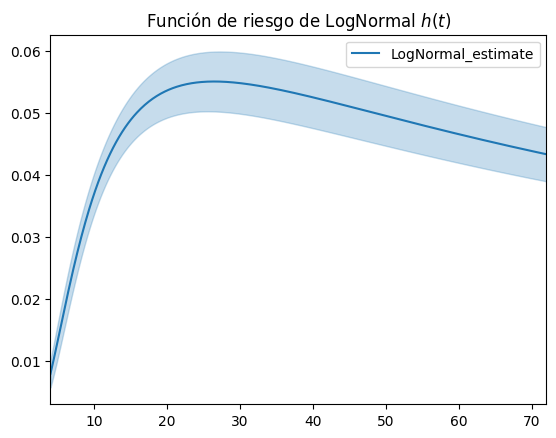

In [115]:
#Función de riesgo de la LogNormal
mlogn.plot_hazard()
plt.title('Función de riesgo de LogNormal $h(t)$')
plt.xlim(4,72);

## Va creciendo rapido y después decrece de manera más lenta

El riesgo de que el préstamo se pague en su totalidad es log-normal respecto al tiempo que se brinda. Se puede ver como crece hasta cierto punto de manera rápida y después empieza a decrecer paulatinamente

### **4. Estimar un modelo de Cox para ver qué factores influyen sobre el riesgo de que el préstamo se pague en su totalidad**

In [116]:
from lifelines import CoxPHFitter
import seaborn as sns

In [117]:
#Volvamos a ver que variables hay
prestamos_creditos.head()

,saldo_cuenta,meses,historia_crediticia,uso,cantidad,saldo_cuenta_ahorro,años_trabajando,tasa_de_interes,genero_estado_civil,aval,...,activos,edad,planes_de_pago,casa,numero_creditos,situacion_laboral,dependientes_economicos,telefono,extranjero,credito_pagado
0,menor_a_cero,6,no_ha_pagado,TV,1169,NaN,mas_de_7,4,hombre_soltero,NaN,...,bienes_raices,67,NaN,propia,2,gobierno,1,1,1,1
1,cero_a_200,48,pago_algun_credito,TV,5951,menor_100,1_a_4,2,mujer_no_soltera,NaN,...,bienes_raices,22,NaN,propia,1,gobierno,1,0,1,0
2,sin_cuenta,12,no_ha_pagado,colegiaturas,2096,menor_100,4_a_7,2,hombre_soltero,NaN,...,bienes_raices,49,NaN,propia,1,obrero,2,0,1,1
3,menor_a_cero,42,pago_algun_credito,mobiliario,7882,menor_100,4_a_7,2,hombre_soltero,aval,...,seguro_vida,45,NaN,prestada,1,gobierno,2,0,1,1
4,menor_a_cero,24,pago_retrasado,coche_nuevo,4870,menor_100,1_a_4,3,hombre_soltero,NaN,...,sin_activos,53,NaN,prestada,2,gobierno,2,0,1,0


a) A parte de “tasa de interes” y “cantidad”, elige otras cuatro variables que 
creas que afectan el riesgo del evento

Las variables escogidas son:

***Situación laboral***

Se escogió esta variable debido a que la situación laboral de una persona esta directamente relacionado con el ingreso que reciba esta persona con su salario, por lo que puede afectar significativamente el riesgo de que una persona pague el préstamo en su totalidad

***Edad***

Se escogió esta variable debido a que se considera que las personas jovenes, de un rango de 18-25 a penas estan encontrando una estabilidad económica y laboral además de que a penas se estan ajustando a las nuevas responsabilidades de un mundo adulto a comparación de señores de 40 años o más, claro que dependen otros factores que influencia si el riesgo de que una persona pague el préstamo aumente o disminuya pero la edad es un factor importante

***numero_creditos***

Se escogió esta variable porque una persona que tenga muchos créditos implica una responsabilidad mayor y si los creditos son de cantidades más grandes entonces puede que una persona no tenga la capacidad de pago suficiente por lo que influencia de manera significativa el riesgo de que una persona pague el préstamo en su totalidad


***dependientes_economicos***

Esta varible también esta directamente relacionada con la capacidad de pago de una persona porque tiene que dividir sus gastos dependienendo las personas que dependan de esta por lo que puede influenciar de manera significativa el riesgo de que una persona pague el préstamo en su totalidad 

In [118]:
# Hacer un nuevo dataframe con las variables que escogí

prestamos_cox = prestamos_creditos[['meses', 'cantidad', 'tasa_de_interes', 'edad', 'numero_creditos', 'situacion_laboral', 'dependientes_economicos', 'credito_pagado']]

In [119]:
prestamos_cox.head()

,meses,cantidad,tasa_de_interes,edad,numero_creditos,situacion_laboral,dependientes_economicos,credito_pagado
0,6,1169,4,67,2,gobierno,1,1
1,48,5951,2,22,1,gobierno,1,0
2,12,2096,2,49,1,obrero,2,1
3,42,7882,2,45,1,gobierno,2,1
4,24,4870,3,53,2,gobierno,2,0


b) Di si cada una de las 6 variables que elegiste, aumentan/disminuyen el 
riesgo del evento y por qué

***situacion_laboral***

La variable situación laboral puede ***aumentar*** o ***disminuir*** el riesgo de que una persona pague el préstamo en su totalidad debido a que influye directamente en su capacidad para generar ingresos y no todos los empleos generan lo mismo, es por eso que puede variar.

***edad***

La edad de una persona ***aumenta*** el riesgo de que una persona pague el préstamo en su totalidad debido a que entre más pase el tiempo se crea mayor estabilidad laboral, mayores ingresos y una historia crediticia más estable.

***cantidad***

La candidad otorgada del préstamo ***disminuye*** el riesgo de que una peprsona pague dicho préstamo en su totalidad, porque a medida a que esta cantidad es mayor los riesgos de que suceda algo en la vida de una persona y no pueda pagar la cantidad aaumenta. Por ejemplo, si una persona se queda sin empleo, es más factible que pueda pagar 2,000 de crédito a 15,000

***tasa_de_interes***

La variable de tasa de interés **aumenta** o **disminuye** el riesgo de que una persona pague el préstamo en su totalidad dependiendo la situación. Entre más alta sea la tasa la de interés los pagos mensuales correspondientes son más elevados por lo que el riego de pagar el préstamo por completo **disminuye** y **aumenta** si la tasa de interés es más baja 

***numero_creditos***

Si la cantidad de creditos otorgados a una persona es alta el riesgo de que una persona pague el préstamo en su totalidad **disminuye** ya que se crea un efecto acumulativo y la capacidad de pago de la persona se ve limitada 

***dependientes_economicos***

Entre más personas dependan económicamente de la persona encargada de pagar el crédito el riesgo de que esta pague en su totalidad dicho préstamo **disminuye** por la limitación en su capacidad de pago

c) Realiza las transformaciones adecuadas para utilizar las variables en un modelo de cox

In [120]:
## Para estimar el modelo depurar la base y hacer las estadísticas descriptivas

## Identificar missing values
prestamos_cox.isnull().sum()

## No hay missing values

meses                      0
cantidad                   0
tasa_de_interes            0
edad                       0
numero_creditos            0
situacion_laboral          0
dependientes_economicos    0
credito_pagado             0
dtype: int64

In [121]:
## Verificar que no hayan valores duplicados
prestamos_cox.duplicated().sum()

## No hay valores duplicados

0

In [122]:
# Checar que tipo de variables son 

prestamos_cox.dtypes

meses                       int64
cantidad                    int64
tasa_de_interes             int64
edad                        int64
numero_creditos             int64
situacion_laboral          object
dependientes_economicos     int64
credito_pagado              int64
dtype: object

Situacion laboral es una variable categórica, hay que convertirla en dummy

In [123]:
# Checar cuales son los valores de las variables categóricas para seleccionar cual eliminar

prestamos_cox['situacion_laboral'].value_counts()

situacion_laboral
gobierno          630
obrero            200
administrativo    148
desempleado        22
Name: count, dtype: int64

In [124]:
# Convertir variable

situacion_dummy = prestamos_cox['situacion_laboral']
situacion_dummy = pd.get_dummies(situacion_dummy, prefix='sl', drop_first = True).astype(int)
situacion_dummy.head()

# La variable con la que compararemos será administrativo

,sl_desempleado,sl_gobierno,sl_obrero
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0


In [125]:
# Eliminar las columnas originales de salario y departamento DataFrame y agregar las nuevas

prestamos_cox = prestamos_cox.drop(['situacion_laboral'], axis=1)
prestamos_cox = pd.concat([prestamos_cox, situacion_dummy], axis=1)
prestamos_cox


,meses,cantidad,tasa_de_interes,edad,numero_creditos,dependientes_economicos,credito_pagado,sl_desempleado,sl_gobierno,sl_obrero
0,6,1169,4,67,2,1,1,0,1,0
1,48,5951,2,22,1,1,0,0,1,0
2,12,2096,2,49,1,2,1,0,0,1
3,42,7882,2,45,1,2,1,0,1,0
4,24,4870,3,53,2,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,31,1,1,1,0,0,1
996,30,3857,4,40,1,1,1,0,0,0
997,12,804,4,38,1,1,1,0,1,0
998,45,1845,4,23,1,1,0,0,1,0


c) Calcular estadísticas descriptivas

In [127]:
prestamos_cox.describe()

,meses,cantidad,tasa_de_interes,edad,numero_creditos,dependientes_economicos,credito_pagado,sl_desempleado,sl_gobierno,sl_obrero
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000
mean,20.903000,3271.258000,2.973000,35.546000,1.407000,1.155000,0.700000,0.022000,0.630000,0.2000
std,12.058814,2822.736876,1.118715,11.375469,0.577654,0.362086,0.458487,0.146757,0.483046,0.4002
min,4.000000,250.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0000
25%,12.000000,1365.500000,2.000000,27.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0000
50%,18.000000,2319.500000,3.000000,33.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.0000
75%,24.000000,3972.250000,4.000000,42.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.0000
max,72.000000,18424.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.0000


d) Estima un modelo de cox con las variables elegidas e interpreta los coeficientes.

In [128]:
modelo_cox = CoxPHFitter().fit(prestamos_cox, 'meses', 'credito_pagado')

In [129]:
modelo_cox.print_summary()

<lifelines.CoxPHFitter: fitted with 1000 total observations, 300 right-censored observations>
             duration col = 'meses'
                event col = 'credito_pagado'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 700
   partial log-likelihood = -4051.48
         time fit was run = 2023-10-05 06:10:02 UTC

---
                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                       
cantidad                 -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
tasa_de_interes          -0.43       0.65       0.04            -0.51            -0.36                 0.60                 0.70
edad                      0.01       1.01       0.00             0.01             0.02                 1.01                 1.02
numero_creditos           0.15       1.16       0.07             0.02             0.28                 1.02                 1.32
dependientes_economicos   0.01       1.01       0.11            -0.20             0.21                 0.82                 1.24
sl_desempleado           -0.70       0.49       0.29            -1.27            -0.14                 0.28                 0.87
sl_gobierno              -0.24       0.79       0.11            -0.46            -0.01                 0.63                 0.99
sl_obrero                -0.01       0.99       0.14            -0.27             0.26                 0.76                 1.30

                          cmp to      z      p   -log2(p)
covariate                                                
cantidad                    0.00 -16.34 <0.005     196.93
tasa_de_interes             0.00 -11.53 <0.005      99.80
edad                        0.00   4.26 <0.005      15.58
numero_creditos             0.00   2.20   0.03       5.18
dependientes_economicos     0.00   0.08   0.94       0.09
sl_desempleado              0.00  -2.44   0.01       6.09
sl_gobierno                 0.00  -2.07   0.04       4.71
sl_obrero                   0.00  -0.06   0.95       0.07
---
Concordance = 0.78
Partial AIC = 8118.95
log-likelihood ratio test = 435.82 on 8 df
-log2(p) of ll-ratio test = 293.64

In [130]:
# Coeficientes sin redondeo
modelo_cox.params_

covariate
cantidad                  -0.000394
tasa_de_interes           -0.432001
edad                       0.014553
numero_creditos            0.147965
dependientes_economicos    0.008339
sl_desempleado            -0.703419
sl_gobierno               -0.238376
sl_obrero                 -0.008136
Name: coef, dtype: float64

In [131]:
# Exp(coef) sin redondear
modelo_cox.hazard_ratios_

covariate
cantidad                   0.999607
tasa_de_interes            0.649209
edad                       1.014659
numero_creditos            1.159472
dependientes_economicos    1.008374
sl_desempleado             0.494890
sl_gobierno                0.787907
sl_obrero                  0.991897
Name: exp(coef), dtype: float64

### **Interpretación de los coeficientes**

Rechazamos $H_0$ si p-value < $alpha$

Además:

Cuando coef(+) , entonces exp(coef) > 1 ,es decir , la variable influye de manera positiva (aumenta) ; (exp(coef)-1)
 
Cuando coef(-) , entonces exp(coef)< 1 ,es decir , la variable influye de manera negativa (disminuye) ; (1-exp(coef))


***cantidad***

0.005 < 0.05

Rechazamos Ho. 

El monto del préstamo otorgado en euros disminuye en 0.039% el riesgo de que una persona pague el préstamo en su totalidad

***tasa_de_interes***

0.005 < 0.05

Rechazamos Ho. 

La tasa de interés disminuye en 35.07% el riesgo de que una persona pague el préstamo en su totalidad

***edad***

0.005 < 0.05

Rechazamos Ho. 

La edad de la persona a la que se le otorga el préstamo aumenta en 1.46% el riesgo de que una persona pague el préstamo en su totalidad

***numero_creditos***

0.005 < 0.05

Rechazamos Ho. 

El número de créditos otorgados a la persona que solicitó el préstamo aumenta en 15.94% el riesgo de que una persona pague el préstamo en su totalidad

***dependientes_economicos***

0.94 > 0.05

No rechazamos Ho. 

Los dependientes economicos de una persona no afecta significativamente el riesgo de que una persona pague el présstamo en su totalidad 

***sl_desempleado***

0.01 < 0.05

Rechazamos Ho. 

El que una persona se encuentre desempleada dismuye en 29.65% el riesgo de que una persona pague el préstamo en su totalidad a comparación de una persona que tenga un empleo administrativo

***sl_gobierno***

0.04 < 0.05

Rechazamos Ho. 

El que una persona se encuentre con un empleo de gobierno dismuye en 21.2% el riesgo de que una persona pague el préstamo en su totalidad a comparación de una persona que tenga un empleo administrativo

***sl_obrero***

0.95 > 0.05

No rechazamos Ho. 

Esto nos indica que el que una persona tenga un empleo de obrero no tiene un efecto significativo en el riesgo de que una persona pague el préstamo en su totalidad



### 5. Con base en los cálculos realizados, redacta un comentario integral de por lo menos 250 palabras que resuma el análisis, reflexiones y recomendaciones sobre la política de otorgamiento de créditos en el Banco de la Ilusión 

El Banco de la Ilusión propociona una base de datos con información importante de los préstamos que otorga a sus clientes, esta base de datos contiene 21 variables y 1000 entradas. En promedio el banco otorga préstamos de 3271.26 euros con una tasa de intéres promedio de 2.97%. Con un modelo de Kaplan Meier se observa que la mitad de estos préstamos fueron pagados en el mes 24. 

Basandose en la evidencia estadística encontrada con el modelo de Cox la política de otorgamiento de créditos en el Banco de la Ilusión debe considerar los siguientes aspectos al momento de otorgar un crédito:

- Manejar tasas de interés factibles para los clientes, si bien, le es conveniente manejar una tasa de interés elevada para recibir mayor ganancia por parte de interesés también se eleva la posibilidad de que el cliente no pueda pagarlo

- Analizar bien el monto del préstamo que se le va a otorgar al cliente, esto debido a que si es muy grande evidentemente el pagarlo puede ser más complicado

- Entre más edad tenga el cliente es más factible que su capacidad de pago sea mayor, sin embargo esto no lo asegura por completo

- El que un cliente tenga o no tenga dependientes económicos no influye en la capacidad de pago del cliente en esta base de datos

Además, la situación laboral del cliente se clasifica como:

- Desempleado
- Gobierno
- Obrero
- Administrativo

Al compararse con una persona con empleo administrativo, el ser desempleado y ser trabajador del gobierno afecta considerablemente el hecho de que una persona pueda pagar o no, por lo que el banco debe tomar sus medidas precauciones con estas personas. 





El Banco de la Ilusión propociona una base de datos con información importante de los préstamos que otorga a sus clientes, esta base de datos contiene 21 variables y 1000 entradas. En promedio el banco otorga préstamos de 3271.26 euros con una tasa de intéres promedio de 2.97%. Con un modelo de Kaplan Meier se observa que la mitad de estos préstamos fueron pagados en el mes 24. 

Basandose en la evidencia estadística encontrada con el modelo de Cox la política de otorgamiento de créditos en el Banco de la Ilusión debe considerar los siguientes aspectos al momento de otorgar un crédito:

- Manejar tasas de interés factibles para los clientes, si bien, le es conveniente manejar una tasa de interés elevada para recibir mayor ganancia por parte de interesés también se eleva la posibilidad de que el cliente no pueda pagarlo

- Analizar bien el monto del préstamo que se le va a otorgar al cliente, esto debido a que si es muy grande evidentemente el pagarlo puede ser más complicado

- Entre más edad tenga el cliente es más factible que su capacidad de pago sea mayor, sin embargo esto no lo asegura por completo

- El que un cliente tenga o no tenga dependientes económicos no influye en la capacidad de pago del cliente en esta base de datos

Además, la situación laboral del cliente se clasifica como:

- Desempleado
- Gobierno
- Obrero
- Administrativo

Al compararse con una persona con empleo administrativo, el ser desempleado y ser trabajador del gobierno afecta considerablemente el hecho de que una persona pueda pagar o no, por lo que el banco debe tomar sus medidas precauciones con estas personas. 



